In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting to know the data set

In [2]:
# load data set
df = pd.read_csv("Wisconsin.csv")

# drop patient id from dataset
df.drop('id', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 31)

In [4]:
labels = ['0', '1']
balance = df.diagnosis.value_counts()
balance

B    357
M    212
Name: diagnosis, dtype: int64

Data set is slightly imbalanced, majority of cells are benign.

In [5]:
balance[0]/balance.sum()

0.62741652021089633

In [6]:
# split into labels Y and instances X
Y = df.values[:, 0]
# 1 is positive => malign => patient has
Y = np.array(list(1. if i=='M' else 0. for i in Y)).astype('float')
X = df.values[:, 1:].astype('float64')
%precision 2
print(Y[0:8])
print(X[0:8, :5])
print(Y.shape, X.shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.]
[[  1.80e+01   1.04e+01   1.23e+02   1.00e+03   1.18e-01]
 [  2.06e+01   1.78e+01   1.33e+02   1.33e+03   8.47e-02]
 [  1.97e+01   2.12e+01   1.30e+02   1.20e+03   1.10e-01]
 [  1.14e+01   2.04e+01   7.76e+01   3.86e+02   1.42e-01]
 [  2.03e+01   1.43e+01   1.35e+02   1.30e+03   1.00e-01]
 [  1.24e+01   1.57e+01   8.26e+01   4.77e+02   1.28e-01]
 [  1.82e+01   2.00e+01   1.20e+02   1.04e+03   9.46e-02]
 [  1.37e+01   2.08e+01   9.02e+01   5.78e+02   1.19e-01]]
(569,) (569, 30)


In [7]:
# balanca data, might be useful later
X_false = X[Y==0]
X_true = X[Y==1]
X_true.shape
X_balanced = np.concatenate([X_false[0:212], X_true])
Y_balanced = np.array(212*[0]+212*[1])

X_balanced.shape, Y_balanced.shape

((424, 30), (424,))

## Exploratory Data Analysis

### Random Scatter

In [8]:
lim = X.shape[1]
a = np.stack(np.meshgrid(np.arange(0,lim), np.arange(0,lim)), -1).reshape(-1, 2)
a = np.array([i for i in a if i[0] != i[1]])
np.random.seed(636)
inds = np.random.choice(range(0, len(a)), size=16)
a = a[inds]

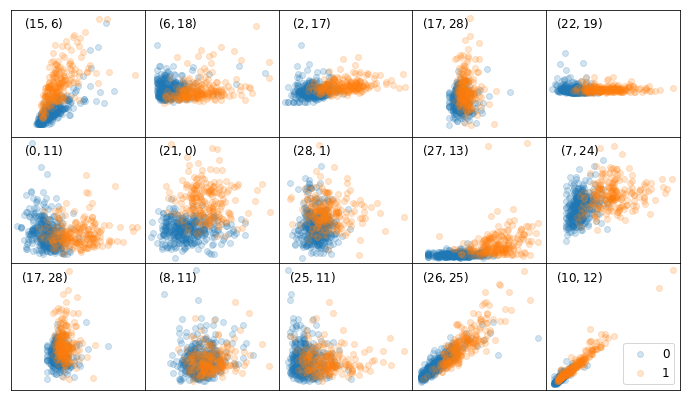

In [9]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 12})

for i in range(0,15):
    fig = plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    for j, label in enumerate(labels):
        plt.scatter(X[Y==j, a[i,0]], X[Y == j, a[i,1]], alpha=.2,
                    label=label)
    plt.text(0.25,0.9, "$({}, {})$".format(a[i,0],a[i,1]),
         horizontalalignment='center',
         verticalalignment='center',
         transform = plt.gca().transAxes)
    if i == 14:
        plt.legend(labels, loc='lower right')
    
plt.subplots_adjust(wspace=0, hspace=0)    
plt.savefig('figs/random_scatter.pdf', bbox_inches='tight')

### PCA

In [57]:
from sklearn.preprocessing import StandardScaler

# standardise X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

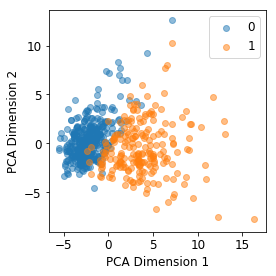

In [11]:
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(X_scaled)
Xp = pca.transform(X_scaled)

plt.figure(figsize=(4,4))
for i, label in enumerate(labels):
    plt.scatter(Xp[Y==i, 0], Xp[Y == i, 1], alpha=.5,
                label=label)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.legend()
plt.savefig("figs/pca_1.pdf")

[(1, 0.44),
 (2, 0.63),
 (3, 0.73),
 (4, 0.79),
 (5, 0.85),
 (6, 0.89),
 (7, 0.91),
 (8, 0.93),
 (9, 0.94),
 (10, 0.95)]

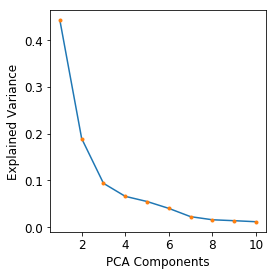

In [12]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(1,11), pca.explained_variance_ratio_)
plt.plot(np.arange(1,11), pca.explained_variance_ratio_, '.')

#plt.plot(np.arange(1,11), np.cumsum(pca.explained_variance_ratio_))
#plt.plot(np.arange(1,11), np.cumsum(pca.explained_variance_ratio_), '.')

pca.explained_variance_[0:4]
plt.xlabel(r'PCA Components')
plt.ylabel('Explained Variance')
plt.tight_layout()
plt.savefig("figs/pca_2.pdf")
list(zip(np.arange(1,10+1),np.cumsum(pca.explained_variance_ratio_)))

6 components explain 89 percent of the variance.

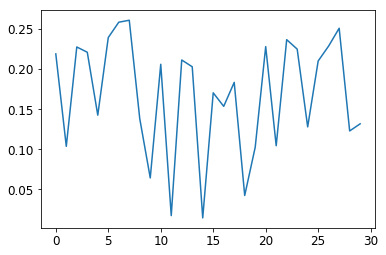

In [13]:
max_vec = pca.components_[0,:] 
plt.plot(max_vec)
max_props = np.argsort(max_vec)[::-1][0:10]

In [14]:
# list components with maximal contribution to first component
[(list(df)[prop],prop) for prop in max_props]

[('concavity_mean', 7),
 ('compactness_mean', 6),
 ('concavity_worst', 27),
 ('smoothness_mean', 5),
 ('texture_worst', 22),
 ('compactness_worst', 26),
 ('fractal_dimension_se', 20),
 ('texture_mean', 2),
 ('perimeter_worst', 23),
 ('perimeter_mean', 3)]

In [15]:
V = pca.components_[0:2, [max_props[0],max_props[1]]]
print(pca.components_.shape)
print(V)

(10, 30)
[[ 0.26  0.26]
 [-0.03  0.06]]


In [16]:
# check orthogonality of components (over all 30 dimensions)
np.dot(pca.components_[1,:], pca.components_[0,:])

0.00

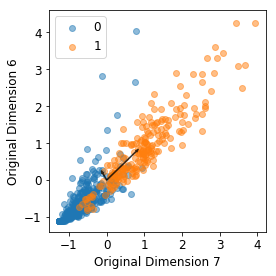

In [17]:
plt.figure(figsize=(4,4))
for i, label in enumerate(labels):
    plt.scatter(X_scaled[Y==i, max_props[0]], X_scaled[Y == i, max_props[1]], alpha=.5,
                label=label)

# scale arrows for visibility
s = 3
plt.arrow(0, 0, s*V[0, 0], s*V[0, 1] , fc='k', ec='k', width = .02, alpha=0.6)
plt.arrow(0, 0, s*V[1, 0], s*V[1, 1] , fc='k', ec='k', width = .02, alpha=0.6)
plt.xlabel('Original Dimension {}'.format(max_props[0]))
plt.ylabel('Original Dimension {}'.format(max_props[1]))
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("figs/pca_3.pdf")

## Nearest Neighbor Classifier

In [18]:
from sklearn import datasets, neighbors, svm, preprocessing
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline

In [19]:
# 10 fold cross validation
# see http://scikit-learn.org/stable/modules/cross_validation.html
# and http://scikit-learn.org/stable/modules/model_evaluation.html
score_list = ['accuracy', 'precision', 'recall']

def cross_validate_with_statistics(classifier, X, Y):

    scores = cross_validate(classifier, X, Y, 
                            cv=KFold(10, shuffle=True, random_state=42), 
                            scoring=score_list, return_train_score=True,
                            )
    
    # get mean and std of 
    means = {s:np.mean(scores[s]) for s in scores}
    stds = {s:np.std(scores[s]) for s in scores}

    return means, stds

In [20]:
def nearest_neighbor(X, Y):
    # instantiate nearest neighbor classifier
    nn = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    # standardise data to 0 mean and 1 variance
    # note that this shows correct behaviour with test data
    # i.e. test data is standardised w/ mean and variance of training data
    nn = make_pipeline(preprocessing.StandardScaler(), nn)
    nn_means, nn_stds = cross_validate_with_statistics(nn, X, Y)

    return nn_means, nn_stds

nearest_neighbor(X_balanced, Y_balanced)

({'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.94,
  'test_precision': 0.94,
  'test_recall': 0.94,
  'train_accuracy': 1.00,
  'train_precision': 1.00,
  'train_recall': 1.00},
 {'fit_time': 0.00,
  'score_time': 0.00,
  'test_accuracy': 0.03,
  'test_precision': 0.05,
  'test_recall': 0.06,
  'train_accuracy': 0.00,
  'train_precision': 0.00,
  'train_recall': 0.00})

As always with NN, training error is 0.

In [21]:
# now do k nearest neighbour
def k_nearest_neighbor(X, Y, ks):
    
    # for each k, [accuracy, precision, and recall] as mean and std
    scores_knn = np.zeros((len(ks), 3, 2))
    for i, k in enumerate(ks):
        # instantiate nearest neighbor classifier
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, algorithm='brute',
                                            metric='euclidean',
                                            weights='uniform')
        # standardise data to 0 mean and 1 variance
        knn = make_pipeline(preprocessing.StandardScaler(), knn)
        means_knn, stds_knn = cross_validate_with_statistics(knn, X, Y)
    
        scores_knn[i, 0, 0] = means_knn['test_accuracy']
        scores_knn[i, 1, 0] = means_knn['test_precision']
        scores_knn[i, 2, 0] = means_knn['test_recall'] 

        scores_knn[i, 0, 1] = stds_knn['test_accuracy']
        scores_knn[i, 1, 1] = stds_knn['test_precision']
        scores_knn[i, 2, 1] = stds_knn['test_recall']
    
    return scores_knn

In [22]:
def knn_plot(knn_res, ks, s):
    from matplotlib.ticker import FormatStrFormatter
    # precision recall plot
    # recall
    xpl = knn_res[:,2,0]
    # precision
    ypl = knn_res[:,1,0]

    xerr = knn_res[:,2,1]
    yerr = knn_res[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

    plt.scatter(xpl, ypl, c=ks, label='k-NN')
    plt.colorbar(format=FormatStrFormatter('%i'), label='$k$')

    plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)

    plt.annotate(r"$k={}$".format(ks[0]), (xpl[0]-0.02, ypl[0]-0.009))
    plt.annotate(r"$k={}$".format(ks[-1]), (xpl[-1]-0.02, ypl[-1]-0.009))

    # this line always needs to be updated depending on which N is used!
    plt.plot([0,1], 2*[balance[1]/balance.sum()], label='guessing', alpha=0.4)

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.9, 1.005)
    plt.xlim(0.4, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

In [23]:
ks = list(range(1,10+1)) + [20, 40, 50, 100, 150, 200, 250, 300]
knn_res = k_nearest_neighbor(X, Y, ks)

# means
print("k, accuracy, precision, recall")
list((zip(ks, knn_res[:,:,0])))

k, accuracy, precision, recall


[(1, array([ 0.95,  0.93,  0.91])),
 (2, array([ 0.95,  0.99,  0.88])),
 (3, array([ 0.96,  0.98,  0.91])),
 (4, array([ 0.96,  0.99,  0.9 ])),
 (5, array([ 0.96,  0.98,  0.92])),
 (6, array([ 0.96,  0.99,  0.91])),
 (7, array([ 0.96,  0.98,  0.92])),
 (8, array([ 0.96,  0.99,  0.91])),
 (9, array([ 0.97,  0.99,  0.93])),
 (10, array([ 0.97,  0.99,  0.93])),
 (20, array([ 0.95,  0.99,  0.89])),
 (40, array([ 0.95,  0.99,  0.87])),
 (50, array([ 0.95,  0.99,  0.87])),
 (100, array([ 0.93,  0.98,  0.83])),
 (150, array([ 0.91,  0.98,  0.78])),
 (200, array([ 0.9 ,  0.99,  0.74])),
 (250, array([ 0.86,  0.98,  0.63])),
 (300, array([ 0.82,  1.  ,  0.52]))]

In [24]:
dists = np.sqrt( (1-knn_res[:,1,0])**2 + (1-knn_res[:,2,0])**2 )
ks[np.argmin(dists)], knn_res[np.argmin(dists), :, 0]

(9, array([ 0.97,  0.99,  0.93]))

In [25]:
# standard deviations
list((zip(ks, knn_res[:,:,1])))

[(1, array([ 0.01,  0.03,  0.03])),
 (2, array([ 0.02,  0.02,  0.06])),
 (3, array([ 0.02,  0.04,  0.05])),
 (4, array([ 0.02,  0.02,  0.06])),
 (5, array([ 0.03,  0.04,  0.07])),
 (6, array([ 0.03,  0.04,  0.07])),
 (7, array([ 0.02,  0.04,  0.05])),
 (8, array([ 0.02,  0.04,  0.06])),
 (9, array([ 0.02,  0.03,  0.05])),
 (10, array([ 0.02,  0.03,  0.05])),
 (20, array([ 0.02,  0.04,  0.06])),
 (40, array([ 0.02,  0.02,  0.05])),
 (50, array([ 0.02,  0.02,  0.05])),
 (100, array([ 0.02,  0.03,  0.06])),
 (150, array([ 0.03,  0.03,  0.06])),
 (200, array([ 0.02,  0.03,  0.05])),
 (250, array([ 0.02,  0.03,  0.05])),
 (300, array([ 0.05,  0.  ,  0.08]))]

In [26]:
# high precision value = there are no false positives. when algorithm says an instance is positive, it is
# low recall value = not all positives are found.
# we likely stop predicting positives all together at high k, because of imbalance in data set
# k ~ N -> we just predict the majority class. which is negative ->> dont predict positives

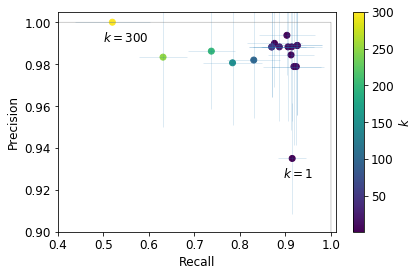

In [27]:
knn_plot(knn_res, ks, 'knn')

In [28]:
# I checked that balancing does not really yield a difference
# knn_res = k_nearest_neighbor(X_balanced, Y_balanced, ks)
# knn_plot(knn_res, 'knn_bal')

In [29]:
# do NN in the first 6 dimensions of PCA space
ks = list(range(1,10+1)) + [20, 40, 50, 100, 150, 200]
knn_res = k_nearest_neighbor(Xp[:,:4], Y, ks)

# means
print("k, accuracy, precision, recall")
list((zip(ks, knn_res[:,:,0])))

k, accuracy, precision, recall


[(1, array([ 0.94,  0.92,  0.91])),
 (2, array([ 0.93,  0.98,  0.83])),
 (3, array([ 0.95,  0.95,  0.91])),
 (4, array([ 0.94,  0.97,  0.87])),
 (5, array([ 0.94,  0.95,  0.89])),
 (6, array([ 0.94,  0.97,  0.86])),
 (7, array([ 0.95,  0.96,  0.89])),
 (8, array([ 0.94,  0.96,  0.86])),
 (9, array([ 0.94,  0.95,  0.89])),
 (10, array([ 0.94,  0.98,  0.87])),
 (20, array([ 0.94,  0.97,  0.85])),
 (40, array([ 0.93,  0.99,  0.82])),
 (50, array([ 0.93,  0.99,  0.81])),
 (100, array([ 0.89,  1.  ,  0.71])),
 (150, array([ 0.86,  1.  ,  0.61])),
 (200, array([ 0.8 ,  1.  ,  0.46]))]

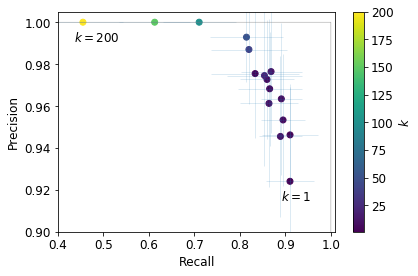

In [30]:
knn_plot(knn_res, ks, 'knn_pca')

## Support Vector Machine

In [31]:
from sklearn.svm import LinearSVC

In [32]:
def lin_svm(X, Y, Cs):
    # for each k, [accuracy, precision, and recall] as mean and std
    scores_svm = np.zeros((len(Cs), 3, 2))
    for i, C in enumerate(Cs):
        # instantiate lin SVM classifier
        
        svm_lin = LinearSVC(random_state=0)
        svm_lin.set_params(C=C, loss='hinge')
        svm_lin = make_pipeline(preprocessing.StandardScaler(), svm_lin)
    
        # standardise data to 0 mean and 1 variance
        means_svm, stds_svm = cross_validate_with_statistics(svm_lin, X, Y)
    
        scores_svm[i, 0, 0] = means_svm['test_accuracy']
        scores_svm[i, 1, 0] = means_svm['test_precision']
        scores_svm[i, 2, 0] = means_svm['test_recall'] 

        scores_svm[i, 0, 1] = stds_svm['test_accuracy']
        scores_svm[i, 1, 1] = stds_svm['test_precision']
        scores_svm[i, 2, 1] = stds_svm['test_recall']
    
    return scores_svm

In [33]:
def svm_plot(knn_res, Cs, s):
    from matplotlib.ticker import FormatStrFormatter
    # precision recall plot
    # recall
    xpl = knn_res[:,2,0]
    # precision
    ypl = knn_res[:,1,0]

    xerr = knn_res[:,2,1]
    yerr = knn_res[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

    plt.scatter(xpl, ypl, c=np.log10(Cs))
    plt.colorbar(format=FormatStrFormatter('%i'), label='$\log_{10} C$')

    plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)

#    plt.annotate(r"$C={:.0e}$".format(Cs[0]), (xpl[0]-0.02, ypl[0]-0.009))
#    plt.annotate(r"$C={:.0e}$".format(Cs[-1]), (xpl[-1]-0.02, ypl[-1]-0.009))
     
    plt.annotate(r"min",(xpl[np.argmin(dists)]+0.004, ypl[np.argmin(dists)]), color='k')
    plt.scatter(xpl[np.argmin(dists)], ypl[np.argmin(dists)], c='k', marker='x', alpha=0.5)


    # this line always needs to be updated depending on which N is used!
    plt.plot([0,1], 2*[balance[1]/balance.sum()], label='guessing', alpha=0.4)

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.88, 1.005)
    plt.xlim(0.88, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

In [34]:
Cs = np.linspace(0.0001, 1, 30)
Cs = np.logspace(-5, 2, 30)
svm_res = lin_svm(X, Y, Cs)

In [35]:
%precision 5
list(zip(Cs, svm_res[:,:,0]))

[(0.00001, array([ 0.93148,  0.90466,  0.90268])),
 (0.00002, array([ 0.93148,  0.90466,  0.90268])),
 (0.00003, array([ 0.93148,  0.90466,  0.90268])),
 (0.00005, array([ 0.93324,  0.90554,  0.90856])),
 (0.00009, array([ 0.93324,  0.90554,  0.90856])),
 (0.00016, array([ 0.93499,  0.90921,  0.90856])),
 (0.00028, array([ 0.93675,  0.91319,  0.90856])),
 (0.00049, array([ 0.94377,  0.93252,  0.90856])),
 (0.00085, array([ 0.95254,  0.9516 ,  0.91318])),
 (0.00149, array([ 0.95777,  0.9635 ,  0.9188 ])),
 (0.00259, array([ 0.96654,  0.96819,  0.93994])),
 (0.00452, array([ 0.97359,  0.98856,  0.93994])),
 (0.00788, array([ 0.97534,  0.99444,  0.93994])),
 (0.01374, array([ 0.9807 ,  0.99444,  0.95458])),
 (0.02395, array([ 0.97895,  0.99444,  0.95073])),
 (0.04175, array([ 0.98246,  0.99444,  0.95958])),
 (0.07279, array([ 0.97892,  0.98468,  0.95958])),
 (0.12690, array([ 0.97719,  0.98413,  0.95558])),
 (0.22122, array([ 0.97365,  0.97093,  0.95943])),
 (0.38566, array([ 0.97365,  0.

In [48]:
# find minimum distance to upper right corner
dists = np.sqrt( (1-svm_res[:,1,0])**2 + (1-svm_res[:,2,0])**2 )
Cs[np.argmin(dists)], svm_res[np.argmin(dists), :, 0]

(0.04175, array([ 0.98246,  0.99444,  0.95958]))

In [49]:
Cs[np.argmin(dists)], svm_res[np.argmin(dists), :, 1]

(0.04175, array([ 0.0111 ,  0.01667,  0.02918]))

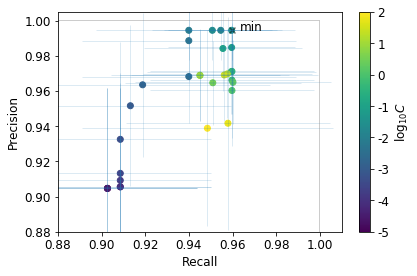

In [37]:
svm_plot(svm_res, Cs, 'svm')

In [38]:
# kernelised SVM, just for fun
# probably wont do much good due to standard deviation of cv

Average difference of 0.002279 with std. dev. of 0.003800.


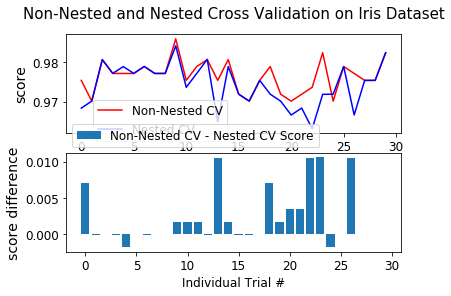

In [39]:
# SIDENOTE:
# nested cross validation, have checked that extra model optimism does not matter
# therefore it was okay that we neglected this above
# and below for computational concerns
# however noise so so large that the extra model optimism probably does not matter 
# vary parameters just for trends in precision recall curves
# code from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# Number of random trials
NUM_TRIALS = 30

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_scaled, Y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_scaled, y=Y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [42]:
svm = SVC(kernel="rbf")
#svm = make_pipeline(preprocessing.StandardScaler(), svm)

p_grid = {"C": [0.1, 1, 10, 100, 1000, 10000],
          "gamma": [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

clf = GridSearchCV(estimator=svm, param_grid=p_grid, verbose=1, 
                   cv=KFold(10, shuffle=True, random_state=42),
                  return_train_score=True, scoring=score_list,
                  refit=False)
clf.fit(X_scaled,Y)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jannikkossen/miniconda3/envs/foml17/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pre

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['accuracy', 'precision', 'recall'], verbose=1)

In [43]:
svm_grid_res = clf.cv_results_

In [53]:
acc = svm_grid_res["mean_test_accuracy"]
rec = svm_grid_res["mean_test_recall"]
prec = svm_grid_res["mean_test_precision"]

acc_err = svm_grid_res["std_test_accuracy"]
rec_err = svm_grid_res["std_test_recall"]
prec_err = svm_grid_res["std_test_precision"]

param_C = svm_grid_res["param_C"]
param_gamma = svm_grid_res["param_gamma"]


dists = np.sqrt( (1-rec)**2 + (1-prec)**2 )
print("max C, max gamma")
np.log10([param_C[np.argmin(dists)], param_gamma[np.argmin(dists)]])

max C, max gamma


array([ 3., -4.])

In [55]:
acc[np.argmin(dists)], rec[np.argmin(dists)], prec[np.argmin(dists)]

(0.97540, 0.95550, 0.98146)

In [56]:
acc_err[np.argmin(dists)], rec_err[np.argmin(dists)], prec_err[np.argmin(dists)]

(0.01788, 0.03621, 0.02302)

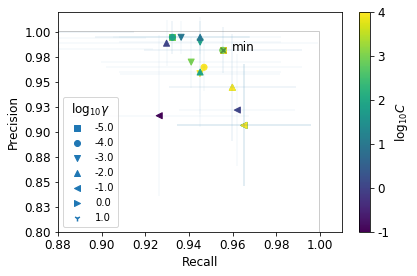

In [46]:
def plot_svm_grid(res, s):

    import itertools
    from matplotlib.ticker import FormatStrFormatter


    xpl = res["mean_test_recall"]
    ypl = res["mean_test_precision"]
    
    xerr = res["std_test_recall"]
    yerr = res["std_test_precision"]
    
    
    param_C = res["param_C"]
    param_gamma = res["param_gamma"]
    
    markers = [",", "o", "v", "^", "<", ">", "1", 
                "s", "p", "*", "h", "+", "x", "d"]

    # choose marker by gamma and color by C
    # note: param_C is masked array, this is why we have to convert it
    
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.2)
    
    
    for i, g in enumerate(np.unique(param_gamma)):
        plt.scatter(xpl[param_gamma==g], ypl[param_gamma==g], marker=markers[i], 
                    c=np.log10(np.array(param_C[param_gamma==g]).astype('float')), label=np.log10(g))
    
    
    
    plt.colorbar(format=FormatStrFormatter('%i'), label=r'$\log_{10} C$')
    
    plt.annotate(r"min",(xpl[np.argmin(dists)]+0.004, ypl[np.argmin(dists)]), color='k')
    plt.scatter(xpl[np.argmin(dists)], ypl[np.argmin(dists)], c='k', marker='x', alpha=0.3)

    plt.plot([0,0.9999,1],[1,1,0], c='gray', alpha=0.8, linewidth=0.5)
    
    
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.8, 1.02)
    plt.xlim(0.88, 1.01)
    plt.legend(loc='lower left', fontsize="small", title=r'$\log_{10} \gamma$')
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

plot_svm_grid(svm_grid_res, 'svm_grid')

## Simple ANN